Alex tosses a fair coin $n$ independent times and Blair tosses a fair coin $m$ independent times. Find an elegant or clever argument to compute the probability that they have equal numbers of Tails. (I will be the judge of whether the argument is elegant, but it had better not involve any lengthy sums.)

Without loss of generality, let $n\geq m$.

Suppose Alex gets $i$ tails, and Blair gets $i$ tails.  Because the coin is fair, the probability of getting $i$ tails is equal to the probability of getting $m-i$ tails.  Hence, the probability that Alex gets $i$ tails and Blair gets $i$ tails is equal to the probability that Alex gets $i$ tails and Blair gets $m-i$ tails, in which case there are a total of $m$ tails.

The key observation here is to note that there is in fact a bijection between the number of ways there are $m$ tails total, and the number of ways Alex and Blair get the same number of tails.  Hence, the probability of this event happening is given by
\begin{align}
p&=\left(\frac{1}{2}\right)^{n+m}{n+m\choose m}\\
&=\left(\frac{1}{2}\right)^{n+m}\frac{(n+m)!}{m!(n+m-m)!}\\
&=\left(\frac{1}{2}\right)^{n+m}\frac{(n+m)!}{m!n!}.\square
\end{align}

In [1]:
import random

In [56]:
from scipy.special import binom

In [61]:
results = {}
for n in [1,2,4,8,16,32]:
    for m in range(0,n+1,max(1,int(n/8))):
        print("(n,m)=({0},{1})".format(n,m))
        num_experiments = int(1e05)
        # estimate p emirically
        pe = 0
        for experiment in range(num_experiments):
            alex = [random.choice([1,0]) for i in range(n)]
            blair = [random.choice([1,0]) for i in range(m)]
            if sum(alex)==sum(blair):
                pe += 1/num_experiments
        results[(n,m)] = pe
        print(round(pe,4))
        # theoretical p; brutce force way
        pt = 0
        for i in range(0,min(n,m)+1):
            pt += (binom(n,i)*0.5**i*0.5**(n-i)) * (binom(m,i)*0.5**i*0.5**(m-i))
        print(round(pt,4))
        # theoretical p; "elegant" way
        pt = binom(n+m,m)*(1/2)**(n+m)
        print(round(pt,4))
        

(n,m)=(1,0)
0.4989
0.5
0.5
(n,m)=(1,1)
0.5011
0.5
0.5
(n,m)=(2,0)
0.2507
0.25
0.25
(n,m)=(2,1)
0.3738
0.375
0.375
(n,m)=(2,2)
0.3762
0.375
0.375
(n,m)=(4,0)
0.0629
0.0625
0.0625
(n,m)=(4,1)
0.1564
0.1562
0.1562
(n,m)=(4,2)
0.2377
0.2344
0.2344
(n,m)=(4,3)
0.2754
0.2734
0.2734
(n,m)=(4,4)
0.2742
0.2734
0.2734
(n,m)=(8,0)
0.0038
0.0039
0.0039
(n,m)=(8,1)
0.0183
0.0176
0.0176
(n,m)=(8,2)
0.0434
0.0439
0.0439
(n,m)=(8,3)
0.0798
0.0806
0.0806
(n,m)=(8,4)
0.1204
0.1208
0.1208
(n,m)=(8,5)
0.157
0.1571
0.1571
(n,m)=(8,6)
0.1852
0.1833
0.1833
(n,m)=(8,7)
0.1959
0.1964
0.1964
(n,m)=(8,8)
0.1977
0.1964
0.1964
(n,m)=(16,0)
0
0.0
0.0
(n,m)=(16,2)
0.0005
0.0006
0.0006
(n,m)=(16,4)
0.0042
0.0046
0.0046
(n,m)=(16,6)
0.0182
0.0178
0.0178
(n,m)=(16,8)
0.0435
0.0438
0.0438
(n,m)=(16,10)
0.08
0.0792
0.0792
(n,m)=(16,12)
0.1133
0.1133
0.1133
(n,m)=(16,14)
0.1358
0.1354
0.1354
(n,m)=(16,16)
0.1412
0.1399
0.1399
(n,m)=(32,0)
0
0.0
0.0
(n,m)=(32,4)
0
0.0
0.0
(n,m)=(32,8)
0.0001
0.0001
0.0001
(n,m)=(32,12)
0.0

In [50]:
from matplotlib import pyplot as plt

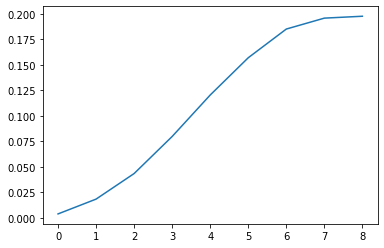

In [64]:
plt.clf()
N = 8
x = list(range(0,N+1,max(1,int(N/8))))
y = [results[(N,i)] for i in x]
plt.plot(x, y)
plt.show()